In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import trim_mean

In [78]:
df = pd.read_csv('state.csv')
print(df.head(),'\n')
print(df.tail(),'\n')
print(df.describe())

   YEAR STATE  RATE DEATHS                                       URL
0  2022    AL  14.9    706     /nchs/pressroom/states/alabama/al.htm
1  2022    AK  10.2     76      /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ   9.0    629     /nchs/pressroom/states/arizona/az.htm
3  2022    AR  11.8    345    /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA   5.9  2,304  /nchs/pressroom/states/california/ca.htm 

     YEAR STATE  RATE DEATHS  \
496  2005    VA   6.4    490   
497  2005    WA   3.6    231   
498  2005    WV   5.4     93   
499  2005    WI   4.3    236   
500  2005    WY   NaN     16   

                                                   URL  
496       /nchs/pressroom/states/virginia/virginia.htm  
497   /nchs/pressroom/states/washington/washington.htm  
498  /nchs/pressroom/states/westvirginia/westvirgin...  
499     /nchs/pressroom/states/wisconsin/wisconsin.htm  
500         /nchs/pressroom/states/wyoming/wyoming.htm   

              YEAR        RATE
count   501.0000

In [79]:
df.drop(columns=['DEATHS','URL'],inplace=True)

In [80]:
df1 = df[df['YEAR'] == 2022]

In [81]:
df1.head()

,YEAR,STATE,RATE
0,2022,AL,14.9
1,2022,AK,10.2
2,2022,AZ,9.0
3,2022,AR,11.8
4,2022,CA,5.9


In [82]:
for data in df['STATE']:
    if data == 'District of Columbia':
        df1.loc[df['STATE']=='District of Columbia','STATE'] = 'DC'

In [87]:
df1

,YEAR,STATE,RATE
0,2022,AL,14.9
1,2022,AK,10.2
2,2022,AZ,9.0
3,2022,AR,11.8
4,2022,CA,5.9
5,2022,CO,7.2
6,2022,CT,4.3
7,2022,DE,7.0
8,2022,DC,23.7
9,2022,FL,7.2


In [93]:
df=df1.dropna()

In [96]:
MurderRate_mean = df['RATE'].mean()
MurderRate_std = df['RATE'].std()
MurderRate_q1 = df['RATE'].quantile(0.25)
MurderRate_q3 = df['RATE'].quantile(0.75)
MurderRate_median = df['RATE'].median()
print(MurderRate_mean,
MurderRate_std,
MurderRate_q1,
MurderRate_q3,
MurderRate_median)

7.930612244897959 4.843733240041225 4.3 10.2 7.2


In [101]:
df = df[(df['RATE']>=MurderRate_q1) & (df['RATE']<=MurderRate_q3)]
df.count()

YEAR     25
STATE    25
RATE     25
dtype: int64

Text(0.5, 1.0, 'STATE and MURDER RATES')

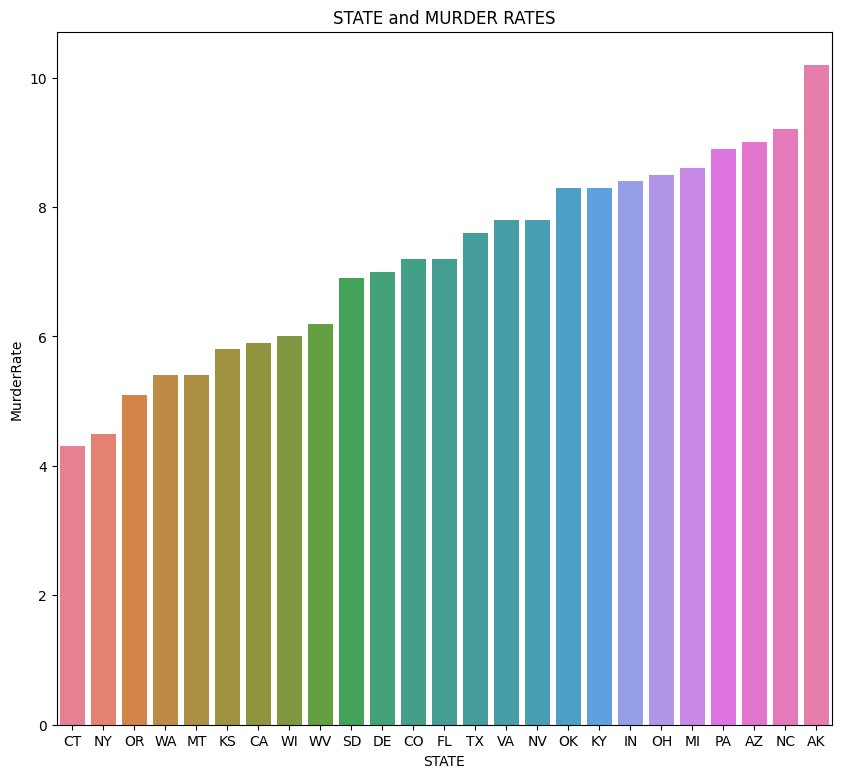

In [125]:
fig,ax1 = plt.subplots()
fig.set_size_inches(10,9)
ax1 = sns.barplot(x='STATE',y='RATE',data=df.sort_values('RATE'),hue='STATE',legend=False)
ax1.set(xlabel='STATE',ylabel='MurderRate')
ax1.set_title('STATE and MURDER RATES')